**Iris Flower Dataset**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"Default accuracy with 10 trees: {default_accuracy:.4f}")

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Default accuracy with 10 trees: 1.0000


Best accuracy: 1.0000 with 1 trees


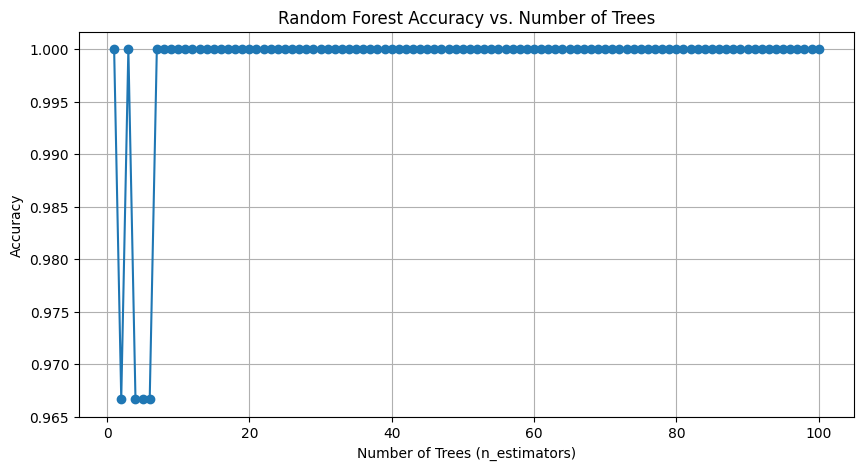

In [4]:
scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

best_score = max(scores)
best_n = n_estimators_range[scores.index(best_score)]
print(f"Best accuracy: {best_score:.4f} with {best_n} trees")

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()